## 차량파손 데이터 EDA

In [1]:
import os
import json
import numpy as np
from glob import glob
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageDraw
from PIL import Image

In [2]:
os.getcwd()

'C:\\Users\\SSAFY\\Desktop\\쏘카\\160. 차량파손 이미지 데이터\\01.데이터'

### 데이터 폴더의 최상단기준에서 실행


In [3]:
damage_images = glob('./2.Validation/2.라벨링데이터/damage/*.json')
damage_part_images = glob('./2.Validation/2.라벨링데이터/damage_part/*.json')

In [4]:
damage_df = pd.DataFrame(columns=("index", "Scratched", "Breakage", "Separated", "Crushed", "width", "height", "total_anns", "ran_var", "dataset"))

In [5]:
def cls_damage(data):
    file_name = data['images']['file_name']
    damage_dict = {"index": file_name, "Scratched" : 0, "Breakage" : 0, "Separated" : 0, "Crushed" : 0, "width" : 0, "height" : 0,"dataset" : ""}
    _sum = 0
    for i in range(len(data['annotations'])):
        damage_type = data['annotations'][i]['damage']
        damage_dict['width'] = data['images']['width']
        damage_dict['height'] = data['images']['height']
        damage_dict[damage_type] += 1
        _sum += 1
    damage_dict["total_anns"] = _sum
    return damage_dict

In [ ]:
for i in tqdm(range(len(damage_images))):
    img = damage_images[i][2:]
    
    with open(f'./{img}', 'r') as f:
        data = json.load(f)
    damage_dict = cls_damage(data)
    
    if(1 <= i % 10 < 8):
        damage_dict['dataset'] = 'train'
    elif(i % 10 == 8 or i % 10 == 9):
        damage_dict['dataset'] = 'val'
    else:
        damage_dict['dataset'] = 'test'
    
    damage_df.loc[i] = damage_dict
damage_df.loc["총합", :] = damage_df.sum(axis = 0, numeric_only = True)

 82%|█████████████████████████████████████████████████████████████▊             | 41602/50445 [01:56<00:36, 243.35it/s]

In [8]:
# dfframe셀 실수 -> 정수변경
damage_df = damage_df.astype({'Scratched' : 'int', 'Breakage' : 'int', 'Separated' : 'int', 'Crushed' : 'int', 'width' : 'int', 'height' : 'int', "total_anns" : 'int'})

In [11]:
damage_df.head(5)

,index,Scratched,Breakage,Separated,Crushed,width,height,total_anns,ran_var,dataset
0,0506233_sc-202337.jpg,0,1,1,0,800,600,2,NaN,test
1,0506234_sc-202337.jpg,0,0,3,0,800,600,3,NaN,train
2,0506235_sc-202337.jpg,1,0,2,0,800,600,3,NaN,train
3,0506236_sc-202337.jpg,1,0,1,0,800,600,2,NaN,train
4,0506237_sc-202337.jpg,2,0,1,0,800,600,3,NaN,train


## 데이터 width, height의 분포

In [70]:
width_range = []
wid_0 = damage_df['width'][damage_df['width'] <= 700].count()
wid_1 = damage_df['width'][damage_df['width'] <= 800].count() - wid_0
wid_2 = damage_df['width'][damage_df['width'] <= 850].count() - wid_1 - wid_0
wid_3 = damage_df['width'][damage_df['width'] <= 900].count() - wid_2 - wid_1 - wid_0
wid_4 = damage_df['width'][damage_df['width'] <= 1000].count() - wid_3 - wid_2 - wid_1 - wid_0
wid_5 = damage_df['width'][damage_df['width'] <= 1200].count() - wid_4 - wid_3 - wid_2 - wid_1 - wid_0
wid_6 = damage_df['width'][damage_df['width'] > 1200].count()
width_range = [wid_0, wid_1, wid_2, wid_3, wid_4, wid_5, wid_6]

## 이미지 Width

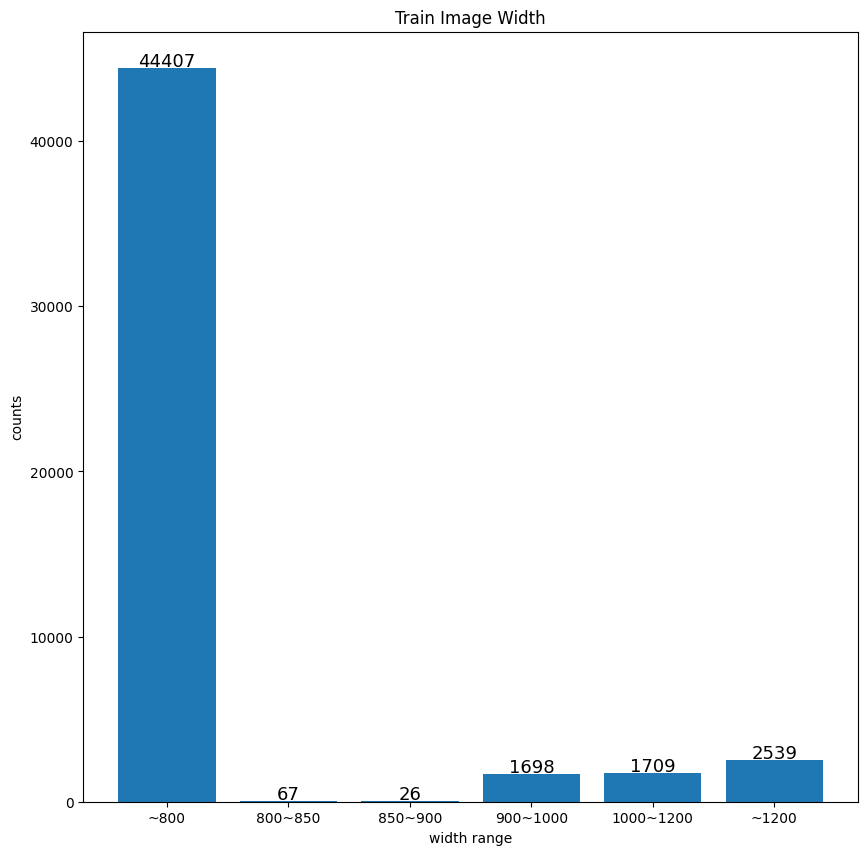

In [71]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

plt.title("Train Image Width")
plt.xlabel("width range")
plt.ylabel("counts")
x_bar = ["~700", "700~800","800~850","850~900","900~1000","1000~1200","~1200"]
xtick_label_position = list(range(len(x_bar))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, x_bar) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, width_range)

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+100, \
            width_range[i],ha='center',fontsize=13)

plt.show()

In [58]:
height_range = []
hei_0 = damage_df['height'][damage_df['height'] <= 500].count()
hei_1 = damage_df['height'][damage_df['height'] <= 600].count() - hei_0
hei_2 = damage_df['height'][damage_df['height'] <= 650].count() - hei_1 - hei_0
hei_3 = damage_df['height'][damage_df['height'] <= 700].count() - hei_2 - hei_1 - hei_0
hei_4 = damage_df['height'][damage_df['height'] <= 800].count() - hei_3 - hei_2 - hei_1 - hei_0
hei_5 = damage_df['height'][damage_df['height'] <= 900].count() - hei_4 - hei_3 - hei_2 - hei_1 - hei_0
hei_6 = damage_df['height'][damage_df['height'] > 900].count()
height_range = [hei_0, hei_1, hei_2, hei_3, hei_4, hei_5, hei_6]

## 이미지 height

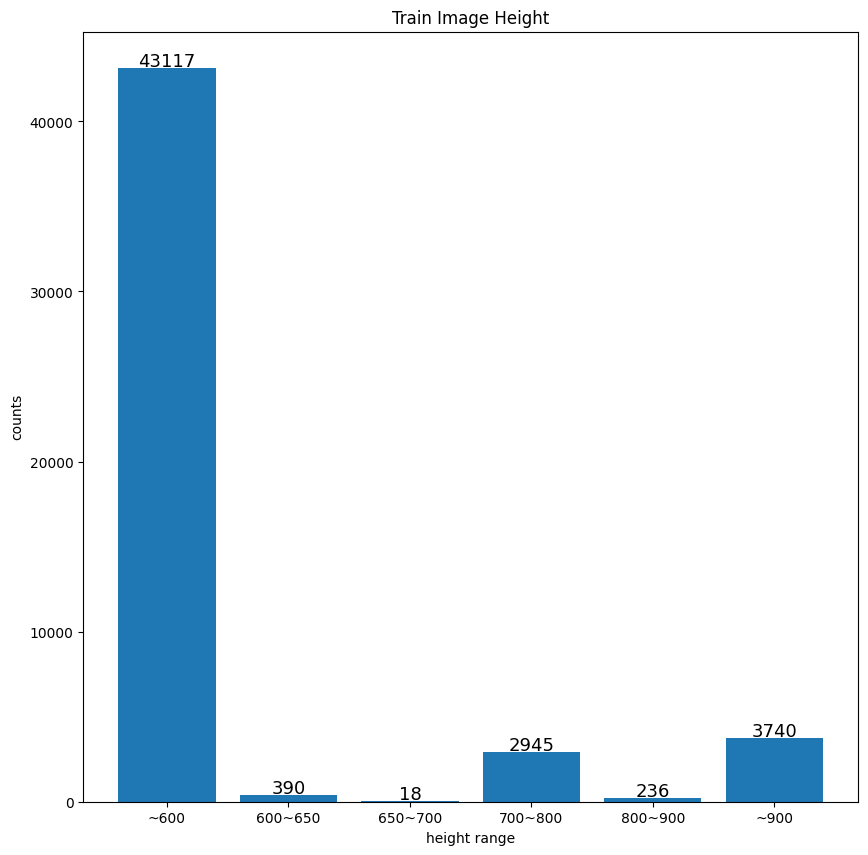

In [78]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

plt.title("Train Image Height")
plt.xlabel("height range")
plt.ylabel("counts")
x_bar = ["~500", "500~600","600~650","650~700","700~800","800~900","~900"]
xtick_label_position = list(range(len(x_bar))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, x_bar) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, height_range)

for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+100, \
            height_range[i],ha='center',fontsize=13)
plt.show()

## 이미지 사진

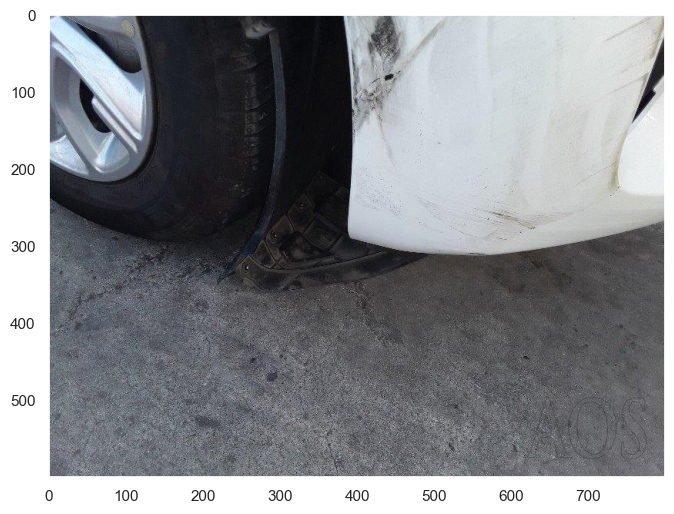

In [80]:
path = './2.Validation/1.원천데이터/damage/0506237_sc-202337.jpg'

image_pil = Image.open(path)
image = np.array(image_pil)

plt.imshow(image)
plt.grid(False)
plt.show()

## Damage class 별 갯수

<Axes: >

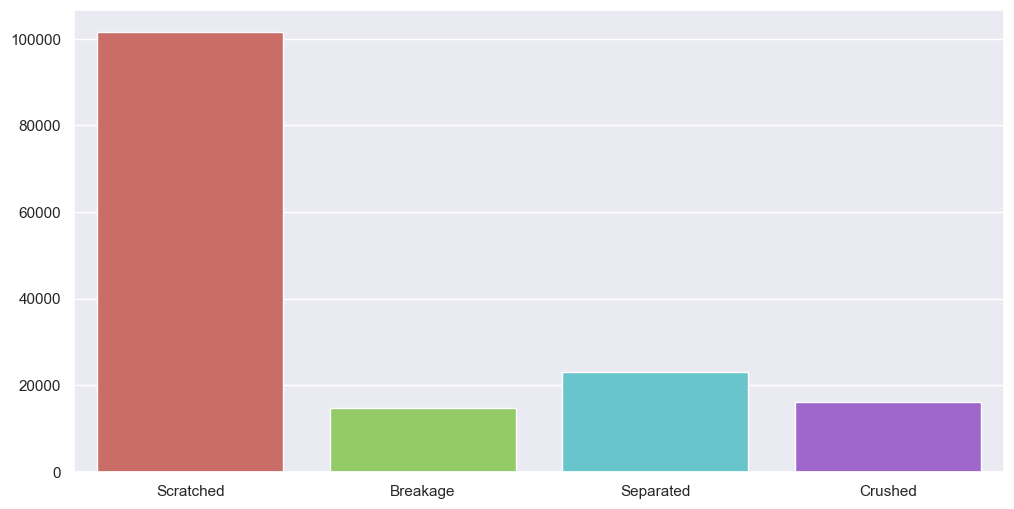

In [44]:
sns.set(rc = {'figure.figsize':(12,6)})

cm = sns.color_palette('hls', 4)
sns.barplot(
  x = ['Scratched', 'Breakage', 'Separated', 'Crushed'],
  y = [x for x in damage_df.loc["총합"][1:5]], palette=cm
)

### images
id  
width  
height  
filme_name

## annotations

id : 라벨링 식별자  
category_id : 사고아이디  
damage : 손상종류  
part : 차량부위  
level : 손상심각도(경미 손상, 소규모 손상, 대규모 손상, 교체수준)  
repair : 수리 방법

## categories 
id : 사고아이디  
supercategory_name : 차량크기